In [ ]:
###################################################
### CODE DEVELOPED BY: DAVID MAZZZANTI TARANCON ###
###################################################

In [1]:
# In this firts block we import all the necessary libraries to work in this project.
import pandas as pd
import geopandas as gpd
import numpy as np
from sodapy import Socrata
import csv
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import matplotlib.patches as mpatches

In [ ]:
# Do this only for the first time!!
# These commands allow us to download the data set by providing the web page and the client.
client = Socrata("analisi.transparenciacatalunya.cat", None)
results = client.get("g2ay-3vnj", limit=863000)
results_df = pd.DataFrame.from_records(results)

# Do this only for the first time!!
# This command line writes the downloaded data in a .csv extension file
results_df.to_csv('data.csv')

In [2]:
# data.csv has to be in the same folder as this code is allowing it to read the downloaded data. .drop removes the first column
# which only enumerates each row.

data_df = pd.read_csv('data.csv').drop(['Unnamed: 0'], axis=1)

In [3]:
# Here we remove any non-interesting columns in our project

data_df = data_df.drop(["municipi", "tal_cod_alarma1", "tal_nom_alarma", "tal_cod_alarma2", "validat", "urgents", "codi_ine", "act_num_actuacio", "nom_regio", "act_dat_actuacio"], axis=1)

C:\Users\elmaz\AppData\Local\Temp\ipykernel_15800\2501635658.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_data = new_data[data_df['codi_comarca']==elem]


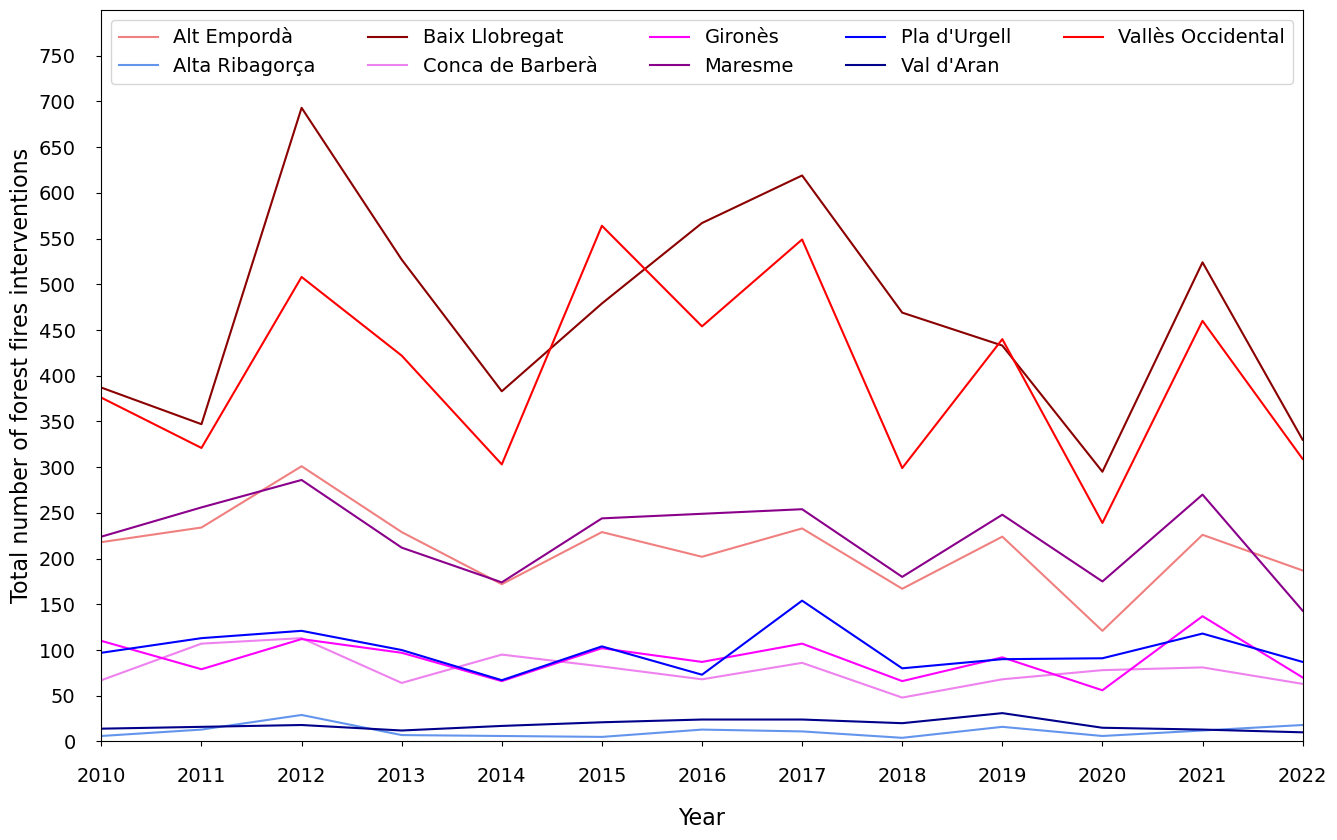

In [4]:
# In this block we'll provide the time evolution of forest fires intereventions only for the selected regions which are:
# 2 -> Alt Empordà ; 5 -> Alta Ribagroça ; 11 -> Baix Llobregat ; 16 -> Conca de Barberà ; 20 -> Gironès ; 
# 21 -> Maresme ; 27 -> Pla d'Urgell ; 39 -> Val d'Aran ; 40 -> Vallès Occidental

codis_analisis = [2,5,11,16,20,21,27,39,40]
f, ax = plt.subplots()

# Since in each loop the data_df variable is changed we save the data in an external variable that does not change through, 
# data_aux provides always the same data.
data_aux = data_df

# Here we define the colors to plot for each region with an index that will run through all the loop
colors = ['lightcoral','cornflowerblue','darkred','violet','magenta','darkmagenta','blue','darkblue','red']
color_index = 0
for elem in codis_analisis:
    data_df = data_aux
    new_data = data_df
    
    # In new_data we select only the two elements that we want to analyze, forest fires (incendi vegetació) and the selected
    # region
    new_data = data_df[data_df["tga_nom_grupo"]=="incendi vegetació"]
    new_data = new_data[data_df['codi_comarca']==elem]
    
    # All the data that satisifies these two conditions are saved in a new list with all the years that the intervention
    # were produced
    any_list = []
    any_list = new_data["any"].values.tolist()
    comarca = new_data.iloc[0]['nom_comarca']
    values = []
    counts = []
    
    # np.unique counts unique elements in a list. i.e. if we have 2010 a total number of 5 times it return a value of 2010
    # with a count value of 5 associated
    values, counts = np.unique(any_list, return_counts=True)
    figure = ax.plot(values, counts, color=colors[color_index], label = comarca)
    color_index += 1
    
# Here we adapt the plot to a more visual result updating the ticks size, font size, plotting the legend in a suitable place
# and increasing the figure size.

plt.legend(loc="upper right", mode = "expand", ncol=5, prop={'size': 14})

plt.xlabel("Year", labelpad=15,fontsize=16)
plt.xlim([2010, 2022])
plt.xticks(np.arange(min(values), max(values)+1, 1))
plt.xticks(fontsize=14)
ax.tick_params(axis='x', which='major', pad=15)

plt.ylabel("Total number of forest fires interventions", fontsize=16)
plt.ylim([0, 800])
plt.yticks(np.arange(0, 800, 50))
plt.yticks(fontsize=14)
ax.tick_params(axis='y', which='major', pad=15)

f.set_size_inches(15.5, 9.5)

plt.savefig("intervention_evolution.pdf", format="pdf", bbox_inches="tight")

In [5]:
# This command line reads the map of Catalonia if the correct file is provided in the data folder.

catalunya = gpd.read_file("data/divisions-administratives-v2r1-comarques-1000000-20220801.shp", crs="EPSG:4226")

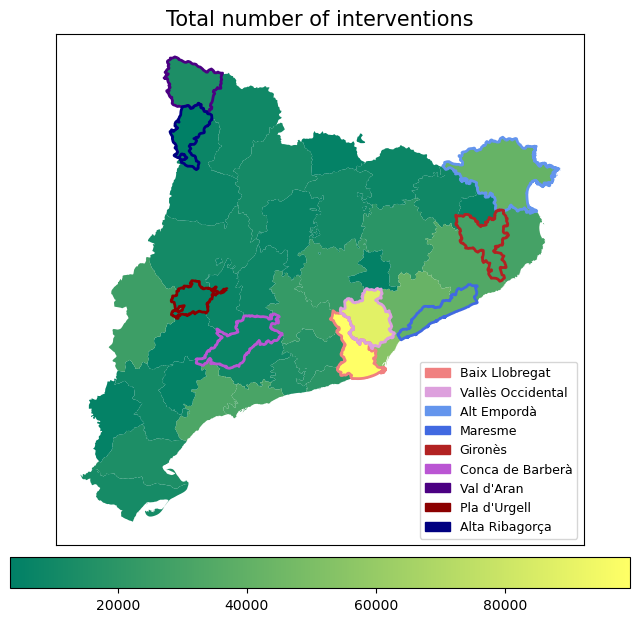

In [6]:
# We build all the number codes for each region in Catalonia
codi_com = [i for i in range(1,43)]

codi_ls = []
counts_ls = []

# This loop is similar as the previous one but know we'll only focus in the region number code without any restriction
# since we want to plot the total number of interventions (using all the dataset).

for elem in codi_com:
    new_data = data_df
    new_data = data_df[data_df['codi_comarca']==elem]
    codi_com_ls = []
    codi_com_ls = new_data["codi_comarca"].values.tolist()
    value, counts = np.unique(codi_com_ls, return_counts=True)
    
    # int command only transform the values into an integer since they are presented as a string and save them in two lists
    # were we provide the code number and the total number of counts
    value = int(value)
    codi_ls.append(value)
    counts = int(counts)
    counts_ls.append(counts)

# Here we impose that the heatmap will plot the total number of counts for each region
catalunya["intervencions"] = counts_ls

# Here we plot the heatmap giving the legend and the color bar (cmap)
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Total number of interventions', fontsize = 15)
catalunya.plot(column = 'intervencions',
                                  ax=ax,
                                  cmap="summer",
                                  legend=True,
                                  legend_kwds={'orientation': "horizontal", 'pad': 0.02})

# The following 9 lines provide the boundary of the selected regions to study with a different color for each shape
catalunya.loc[catalunya['NOMCOMAR'] == "Baix Llobregat"].plot(ax=ax, label="True", facecolor='none', edgecolor='lightcoral', linewidth=2)
catalunya.loc[catalunya['NOMCOMAR'] == "Vallès Occidental"].plot(ax=ax, facecolor='none', edgecolor='plum', linewidth=2, legend=True)
catalunya.loc[catalunya['NOMCOMAR'] == "Alt Empordà"].plot(ax=ax, facecolor='none', edgecolor='cornflowerblue', linewidth=2)

catalunya.loc[catalunya['NOMCOMAR'] == "Maresme"].plot(ax=ax, facecolor='none', edgecolor='royalblue', linewidth=2)
catalunya.loc[catalunya['NOMCOMAR'] == "Gironès"].plot(ax=ax, facecolor='none', edgecolor='firebrick', linewidth=2)
catalunya.loc[catalunya['NOMCOMAR'] == "Conca de Barberà"].plot(ax=ax, facecolor='none', edgecolor='mediumorchid', linewidth=2)

catalunya.loc[catalunya['NOMCOMAR'] == "Val d'Aran"].plot(ax=ax, facecolor='none', edgecolor='indigo', linewidth=2)
catalunya.loc[catalunya['NOMCOMAR'] == "Pla d'Urgell"].plot(ax=ax, facecolor='none', edgecolor='darkred', linewidth=2)
catalunya.loc[catalunya['NOMCOMAR'] == "Alta Ribagorça"].plot(ax=ax, facecolor='none', edgecolor='navy', linewidth=2)

# These commands allow us to plot the legend in the place we want
patch_dict = {'lightcoral':'Baix Llobregat', "plum":"Vallès Occidental", "cornflowerblue":"Alt Empordà", "royalblue":"Maresme",
             "firebrick":"Gironès", "mediumorchid":"Conca de Barberà", "indigo":"Val d'Aran", "darkred":"Pla d'Urgell", 
              "navy":"Alta Ribagorça"}
patch_list = []
for k, v in patch_dict.items():

    patch_list.append(mpatches.Patch(color=k, label=v))
plt.legend(handles=patch_list, loc='lower right',prop={'size': 9} )

plt.savefig("total_inter.pdf", format="pdf", bbox_inches="tight")

68101


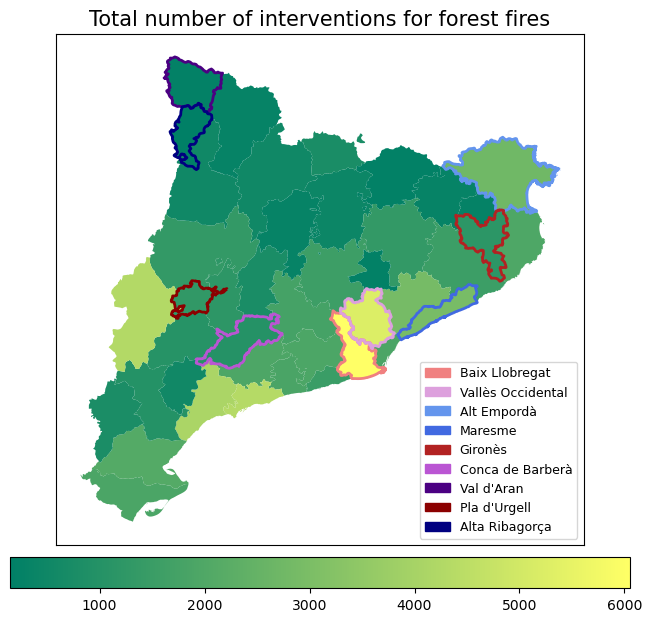

In [7]:
# The followin code is almost the same as the previous one but adding the restricition to forest fires only

catalunya = gpd.read_file("data/divisions-administratives-v2r1-comarques-1000000-20220801.shp", crs="EPSG:4226")

codi_com = [i for i in range(1,43)]

codi_ls = []
counts_ls = []
data_df = data_aux
for elem in codi_com:
    new_data = data_df
    new_data = new_data[new_data["tga_nom_grupo"]=="incendi vegetació"]
    new_data = new_data[new_data['codi_comarca']==elem]
    com_ls = []
    com_ls = new_data["codi_comarca"].values.tolist()
    value, counts = np.unique(com_ls, return_counts=True)
    value = int(value)
    codi_ls.append(value)
    counts = int(counts)
    counts_ls.append(counts)
    
print(sum(counts_ls))
catalunya["intervencions focs"] = counts_ls

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Total number of interventions for forest fires', fontsize = 15)
catalunya.plot(column = 'intervencions focs',
                                  ax=ax,
                                  cmap="summer",
                                  legend=True,
                                  legend_kwds={'orientation': "horizontal", 'pad': 0.02})

catalunya.loc[catalunya['NOMCOMAR'] == "Baix Llobregat"].plot(ax=ax, label="True", facecolor='none', edgecolor='lightcoral', linewidth=2)
catalunya.loc[catalunya['NOMCOMAR'] == "Vallès Occidental"].plot(ax=ax, facecolor='none', edgecolor='plum', linewidth=2, legend=True)
catalunya.loc[catalunya['NOMCOMAR'] == "Alt Empordà"].plot(ax=ax, facecolor='none', edgecolor='cornflowerblue', linewidth=2)

catalunya.loc[catalunya['NOMCOMAR'] == "Maresme"].plot(ax=ax, facecolor='none', edgecolor='royalblue', linewidth=2)
catalunya.loc[catalunya['NOMCOMAR'] == "Gironès"].plot(ax=ax, facecolor='none', edgecolor='firebrick', linewidth=2)
catalunya.loc[catalunya['NOMCOMAR'] == "Conca de Barberà"].plot(ax=ax, facecolor='none', edgecolor='mediumorchid', linewidth=2)

catalunya.loc[catalunya['NOMCOMAR'] == "Val d'Aran"].plot(ax=ax, facecolor='none', edgecolor='indigo', linewidth=2)
catalunya.loc[catalunya['NOMCOMAR'] == "Pla d'Urgell"].plot(ax=ax, facecolor='none', edgecolor='darkred', linewidth=2)
catalunya.loc[catalunya['NOMCOMAR'] == "Alta Ribagorça"].plot(ax=ax, facecolor='none', edgecolor='navy', linewidth=2)

patch_dict = {'lightcoral':'Baix Llobregat', "plum":"Vallès Occidental", "cornflowerblue":"Alt Empordà", "royalblue":"Maresme",
             "firebrick":"Gironès", "mediumorchid":"Conca de Barberà", "indigo":"Val d'Aran", "darkred":"Pla d'Urgell", 
              "navy":"Alta Ribagorça"}
patch_list = []
for k, v in patch_dict.items():

    patch_list.append(mpatches.Patch(color=k, label=v))
plt.legend(handles=patch_list, loc='lower right',prop={'size': 9} )

plt.savefig("inter_forest_fires.pdf", format="pdf", bbox_inches="tight")

164753


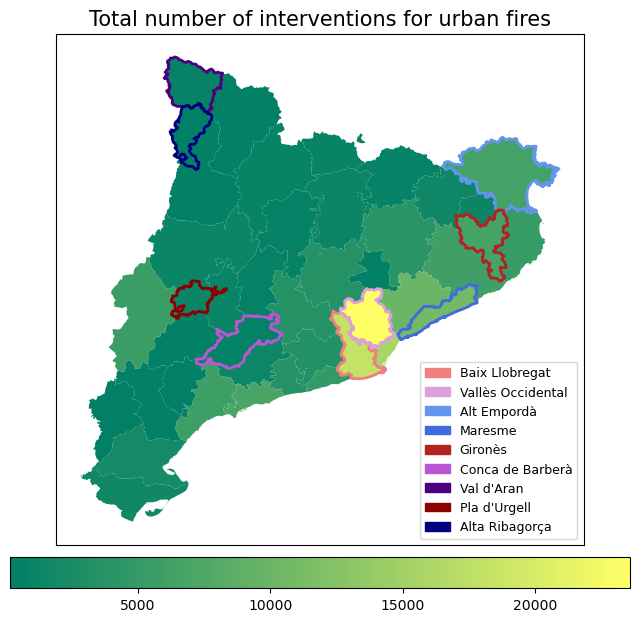

In [8]:
# The followin code is almost the same as the previous one but adding the restricition to urban fires only

catalunya = gpd.read_file("data/divisions-administratives-v2r1-comarques-1000000-20220801.shp", crs="EPSG:4226")

codi_com = [i for i in range(1,43)]

codi_ls = []
counts_ls = []
data_df = data_aux
for elem in codi_com:
    new_data = data_df
    new_data = new_data[new_data["tga_nom_grupo"]=="incendi urbà"]
    new_data = new_data[new_data['codi_comarca']==elem]
    com_ls = []
    com_ls = new_data["codi_comarca"].values.tolist()
    value, counts = np.unique(com_ls, return_counts=True)
    value = int(value)
    codi_ls.append(value)
    counts = int(counts)
    counts_ls.append(counts)
    
print(sum(counts_ls))
catalunya["intervencions focs"] = counts_ls

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Total number of interventions for urban fires', fontsize = 15)
catalunya.plot(column = 'intervencions focs',
                                  ax=ax,
                                  cmap="summer",
                                  legend=True,
                                  legend_kwds={'orientation': "horizontal", 'pad': 0.02})

catalunya.loc[catalunya['NOMCOMAR'] == "Baix Llobregat"].plot(ax=ax, label="True", facecolor='none', edgecolor='lightcoral', linewidth=2)
catalunya.loc[catalunya['NOMCOMAR'] == "Vallès Occidental"].plot(ax=ax, facecolor='none', edgecolor='plum', linewidth=2, legend=True)
catalunya.loc[catalunya['NOMCOMAR'] == "Alt Empordà"].plot(ax=ax, facecolor='none', edgecolor='cornflowerblue', linewidth=2)

catalunya.loc[catalunya['NOMCOMAR'] == "Maresme"].plot(ax=ax, facecolor='none', edgecolor='royalblue', linewidth=2)
catalunya.loc[catalunya['NOMCOMAR'] == "Gironès"].plot(ax=ax, facecolor='none', edgecolor='firebrick', linewidth=2)
catalunya.loc[catalunya['NOMCOMAR'] == "Conca de Barberà"].plot(ax=ax, facecolor='none', edgecolor='mediumorchid', linewidth=2)

catalunya.loc[catalunya['NOMCOMAR'] == "Val d'Aran"].plot(ax=ax, facecolor='none', edgecolor='indigo', linewidth=2)
catalunya.loc[catalunya['NOMCOMAR'] == "Pla d'Urgell"].plot(ax=ax, facecolor='none', edgecolor='darkred', linewidth=2)
catalunya.loc[catalunya['NOMCOMAR'] == "Alta Ribagorça"].plot(ax=ax, facecolor='none', edgecolor='navy', linewidth=2)

patch_dict = {'lightcoral':'Baix Llobregat', "plum":"Vallès Occidental", "cornflowerblue":"Alt Empordà", "royalblue":"Maresme",
             "firebrick":"Gironès", "mediumorchid":"Conca de Barberà", "indigo":"Val d'Aran", "darkred":"Pla d'Urgell", 
              "navy":"Alta Ribagorça"}
patch_list = []
for k, v in patch_dict.items():

    patch_list.append(mpatches.Patch(color=k, label=v))
plt.legend(handles=patch_list, loc='lower right',prop={'size': 9} )

plt.savefig("inter_urban_fires.pdf", format="pdf", bbox_inches="tight")